In [77]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import csv
import seaborn as sns


df = pd.read_csv("Amazon Items Cleaned.csv" )
print(df.shape)
df

(5116, 8)


,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,Amazon Ethernet Adapter for Amazon Fire TV Dev...,Amazon,64803.0,0,1,1000.0,0.00,4.5
1,Amazon Basics Dual-Port USB Car Charger Adapte...,Amazon Basics,7851.0,0,1,82.0,0.00,4.6
2,Echo Auto- Hands-free Alexa in your car with y...,Amazon,145478.0,0,1,1000.0,0.00,4.0
3,"Echo (4th Gen) | With premium sound, smart hom...",Amazon,117007.0,0,1,1000.0,0.00,4.7
4,"Stylus Pencil for Amazon Fire HD 10 Pen, EDIVI...",EDIVIA,82.0,0,1,0.0,16.99,4.3
...,...,...,...,...,...,...,...,...
5111,American Eagle Gift Card,American Eagle,5999.0,0,0,4.0,25.00,4.9
5112,Amazon.com Gift Cards - As a Bookmark,Amazon,3950.0,0,0,15.0,100.00,4.9
5113,Amazon.com Gift Card in a Gift Tag,Amazon,7520.0,0,0,12.0,10.00,4.9
5114,"Amazon.com $10 Gift Cards, Pack of 3 (Holiday ...",Amazon,3014.0,0,0,3.0,30.00,4.9


# First look on the data

In [78]:
# Non null means our data is full without missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          5116 non-null   object 
 1   Brand         5116 non-null   object 
 2   Rating        5116 non-null   float64
 3   BestSeller    5116 non-null   int64  
 4   AmazonChoice  5116 non-null   int64  
 5   Comments      5116 non-null   float64
 6   Price         5116 non-null   float64
 7   Stars         5116 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 319.9+ KB


# Checking data after cleaning

In [79]:
df.describe(include='all')

,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
count,5116,5116,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000
unique,4131,1755,NaN,NaN,NaN,NaN,NaN,NaN
top,The Franklin Mint Founding Fathers Coin Collec...,0,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,1662,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6562.867866,0.020328,0.133503,33.890735,45.650004,3.756001
std,NaN,NaN,30537.459072,0.141135,0.340151,127.248506,182.150969,1.639551
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,37.000000,0.000000,0.000000,0.000000,0.000000,3.900000
50%,NaN,NaN,312.500000,0.000000,0.000000,0.000000,12.990000,4.500000
75%,NaN,NaN,2308.000000,0.000000,0.000000,10.000000,29.990000,4.700000


# Frequency table check for best seller items
# we can see in the pie chart that 2.8% of overall products are Best Sellers

   BestSeller  Frequency          p
0           0       5012  97.967162
1           1        104   2.032838


<AxesSubplot:ylabel='BestSeller'>

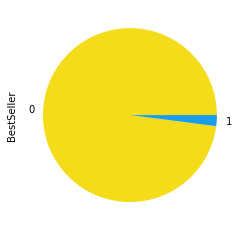

In [80]:
# Show the Frequency of the Best Sellers items with PIE visualization -------------------------------------------------------------------------------

counts = df["BestSeller"].value_counts()
p = df["BestSeller"].value_counts(normalize = True) * 100
index = [0,1]
FrequencyDF = pd.DataFrame({"BestSeller" : index,"Frequency": counts, "p" : p})
print(FrequencyDF)

myColors = ['#F5DC1A', '#179deb']
df['BestSeller'].value_counts().plot(kind = 'pie', colors = myColors)

# Checking for outliers products by price with an histogram

Text(0, 0.5, 'Amount')

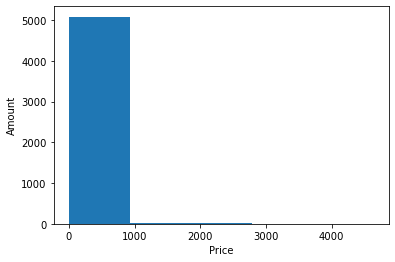

In [81]:
# We can see that most of the items in amazon are falling under the first section in the histogram price < 500 ------------------------------------------------

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(df.Price, bins = 5)
plt.xlabel("Price")
plt.ylabel("Amount")

# Let's check if the products above 700 USD are Best Selleers

In [82]:
# Code if price > 700 check if item is bestseller

# What is the amount of outliers products in Price ?
# All the products with a price above 700 USD
# We can see in the boxplot all 31 outliers

45


c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

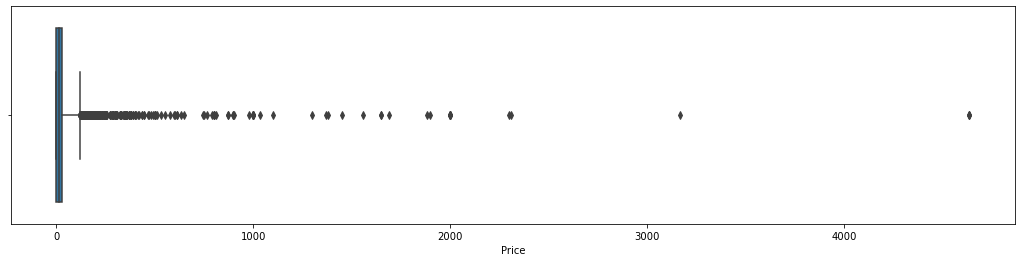

In [83]:
print(sum(df.Price > 700))
fig = plt.figure(figsize=(18,4))
sns.boxplot(df.Price, whis=3)

# Checking the outliers with IQR variable

In [84]:
Q1 = np.percentile(df["Price"], 25)
Q3 = np.percentile(df["Price"], 75)
IQR = Q3 - Q1

fareOutlierRows = df[(df["Price"] < Q1 - 1.5 * IQR) | (df["Price"] > Q3 + 1.5 * IQR )].index

print("The amount of outliers by IQR : " + str(len(fareOutlierRows)))

z_price = (df['Price'] - df['Price'].mean()) / df['Price'].std()
outliers = abs(z_price) > 3
print("We found that there are " + str(sum(outliers)) + " items above 700 USD")

min(df.Price[outliers])
df.Price[df.Price > 700] = np.nan
df = df.dropna(axis=0, thresh=8)
df["Price"].describe()

The amount of outliers by IQR : 557
We found that there are 51 items above 700 USD


C:\Users\Yaniv\AppData\Local\Temp/ipykernel_32620/1306250314.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Price[df.Price > 700] = np.nan


count    5071.000000
mean       32.229992
std        65.661027
min         0.000000
25%         0.000000
50%        12.990000
75%        29.950000
max       649.000000
Name: Price, dtype: float64

# After droping all prices outliers we can see the new boxplot

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

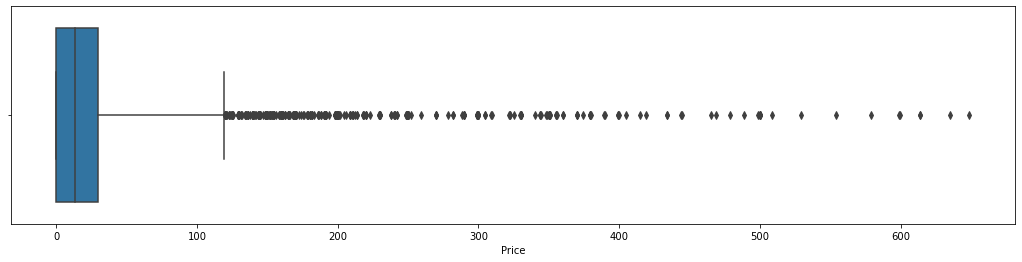

In [85]:
fig = plt.figure(figsize=(18,4))
sns.boxplot(df.Price, whis=3)

# Correlation - Best Seller -> Comments

Text(0, 0.5, 'Comments')

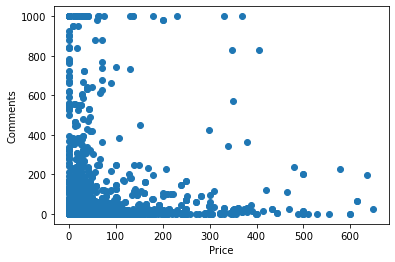

In [87]:
plt.scatter(df.Price, df.Comments)
plt.xlabel("Price")
plt.ylabel("Comments")

# We don't see any linear pattern between prices and amount of comments on an item
# but we can see that items with price > 400 usd has less amount of comments generally.

# Scaterring - Best Seller -> Rating

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BestSeller', ylabel='Rating'>

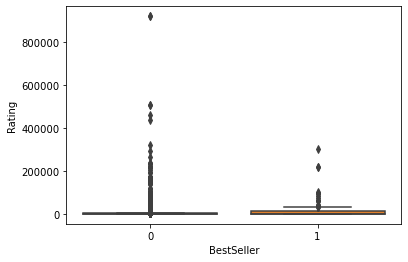

In [88]:
sns.boxplot(df.BestSeller, df.Rating)

# Here we can see that the amount of people rating products doesn't affect if an item is a best seller or not

# correlation - Best Seller -> Stars

In [89]:
ct1 = pd.crosstab(df["Stars"], df["BestSeller"])
ct1

BestSeller,0,1
Stars,,
0.0,755,8
1.0,11,0
1.3,1,0
1.5,1,0
1.8,2,0
1.9,1,0
2.0,4,0
2.1,3,0
2.2,1,0


# We can see that almost all Best Seller items must have above 4.0 stars

Text(0, 0.5, 'Best Seller')

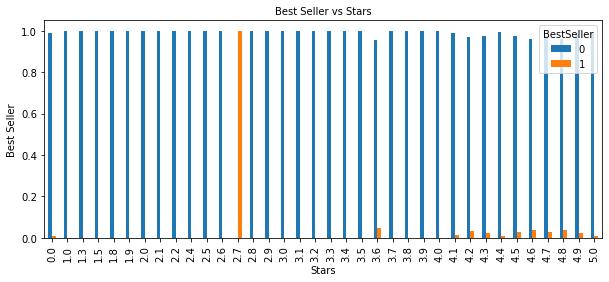

In [90]:
ct2 = pd.crosstab(df["Stars"], df["BestSeller"], normalize="index")
ct2.plot(kind = 'bar', figsize = (10,4))
plt.title('Best Seller vs Stars', fontsize = 10)
plt.xlabel('Stars')
plt.ylabel('Best Seller')

# We found that there is some correlation, if an item has above 4.0 Stars it can be a Best Seller
# Let's chack that assumption with the - Chi Test -

# H0 = There is no correlation between Best Seller and Stars

In [91]:
from scipy.stats import chi2_contingency
chi2_contingency(ct1)

(91.75362005678457,
 5.567841508961042e-07,
 35,
 array([[7.47351804e+02, 1.56481956e+01],
        [1.07744035e+01, 2.25596529e-01],
        [9.79491225e-01, 2.05087754e-02],
        [9.79491225e-01, 2.05087754e-02],
        [1.95898245e+00, 4.10175508e-02],
        [9.79491225e-01, 2.05087754e-02],
        [3.91796490e+00, 8.20351016e-02],
        [2.93847367e+00, 6.15263262e-02],
        [9.79491225e-01, 2.05087754e-02],
        [2.93847367e+00, 6.15263262e-02],
        [1.95898245e+00, 4.10175508e-02],
        [4.89745612e+00, 1.02543877e-01],
        [9.79491225e-01, 2.05087754e-02],
        [8.81542102e+00, 1.84578979e-01],
        [6.85643857e+00, 1.43561428e-01],
        [3.33027016e+01, 6.97298363e-01],
        [1.37128771e+01, 2.87122855e-01],
        [1.95898245e+01, 4.10175508e-01],
        [2.05693157e+01, 4.30684283e-01],
        [4.01591402e+01, 8.40859791e-01],
        [4.21181227e+01, 8.81877342e-01],
        [6.36669296e+01, 1.33307040e+00],
        [5.97489647e+01, 1.

# P value < 0.05 therefore H0 is wrong and we do have a connection between Best Seller and Stars and we pick the H1

<AxesSubplot:xlabel='Price', ylabel='Stars'>

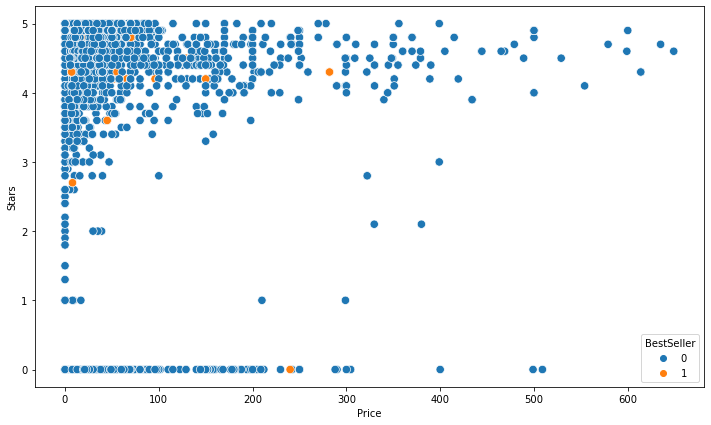

In [92]:
fig = plt.figure(figsize = (12,7))
sns.scatterplot(x = 'Price', y = 'Stars', s = 70, hue = 'BestSeller', data = df)

# Here we see that if the price is low the item will be a best seller

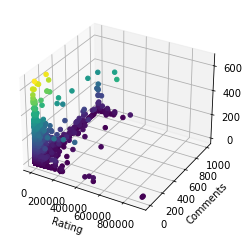

In [93]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection = '3d')

xdata = df.Rating
ydata = df.Comments
zdata = df.Price

plt.xlabel('Rating')
plt.ylabel('Comments')

ax.scatter3D(xdata,ydata,zdata,c = zdata,depthshade = False)

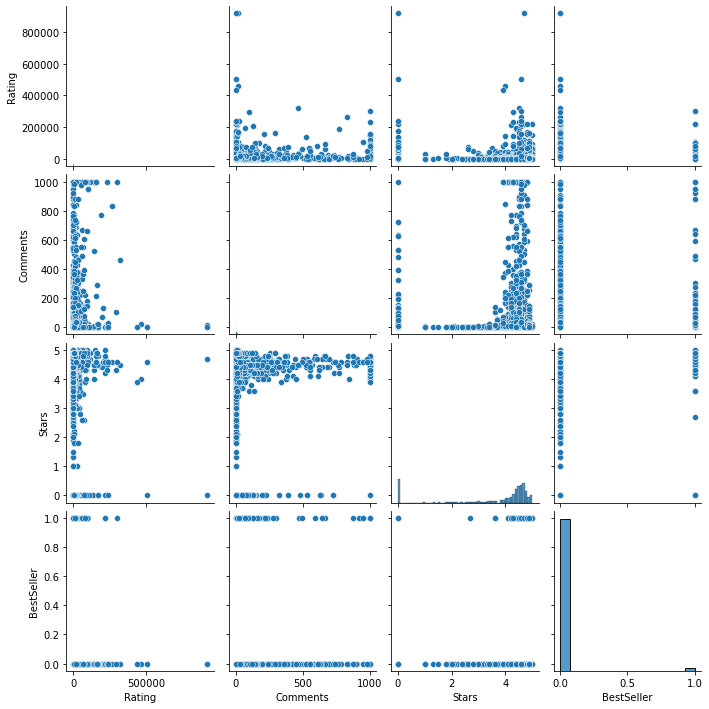

In [94]:
sns.pairplot(df[['Rating', 'Comments', 'Stars', 'BestSeller']])